# Machine Learning
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [4]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,181,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


Considering the total purchase cost of each product category and the statistical description of the dataset above for our sample customers. We make a prediction on what kind of establishment (customer) could each of the three samples we've chosen represent?

The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do our samples compare? 

1) Index 85: Retailer:

    - Largest spending on detergents and paper and groceries of the entire dataset, which usually are products for houses.
    
    - Higher than average spending on milk.
    
    - Lower than average spending on frozen products.

2) Index 181: Large market

    - High spending on almost every product category.
    
    - Highest spending on fresh products of the entire dataset. Likely to be a large market.
    
    - Low spending on detergents.
   
3) Index 338: Restaurant

    - The amount of every product is significantly lower than the previous two customers considered. 
    
    - The spending on fresh products is the lowest of the entire dataset. 
    
    - The spending on milk and detergent and papers is in the bottom quartile.
    
    - It may be a small and cheap restaurant which needs groceries and frozen food to serve the meals.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [5]:
data.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338


In [6]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_data, data.Grocery, test_size=0.25, random_state=42)

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)

# Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("Prediction score is: {}".format(score))

Prediction score is: 0.6974141472970574


- We tried to predict the Grocery feature.

- The reported prediction score was 67.25%.

- As we obtained high score, it as indicator of a very good fit. So this feature is easy to predict considering the rest of spendign habits and, therefore, not very necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. Features relevant to predict the above, won't show a correlation in the scatter matrix and the inverse is also true.

C:\Users\RAZIM\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


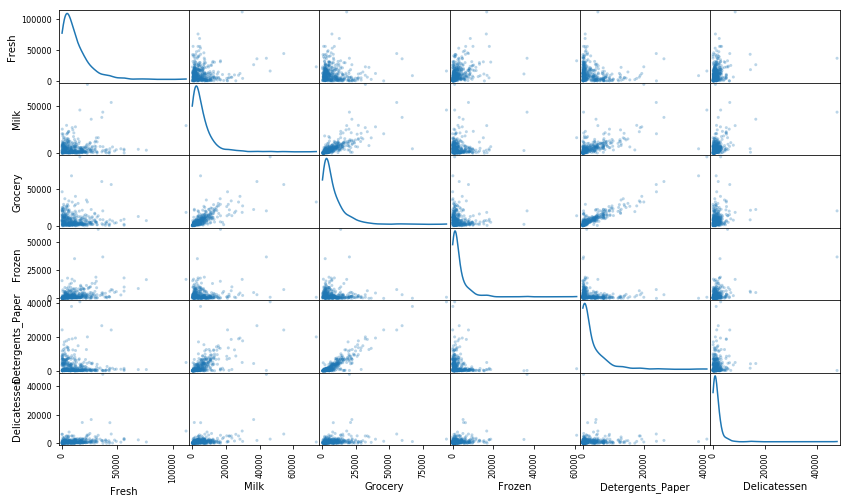

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

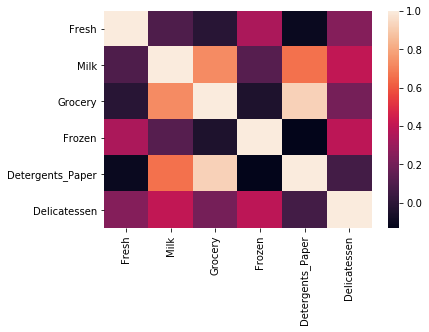

In [8]:
import seaborn as sns

sns.heatmap(data.corr())

Using the scatter matrix as a reference, we can discuss the following:

- Data is not normally distributed, it is positively skewed and they resemeble the log-normal distribution.

- In most plots, most data points lie near the origin which shows little correlation between them.

- From the scatter plots and the heatmap of correlation, we can see that there is a strong correlation between the 'Grocery' and 'Detergent_paper' features. The features 'Grocery' and 'Milk' also show a good degree of correlation.

- This correlation confirms my guess about the relevance of the 'Grocery' feature, which can be accurately predicted with the 'Detergent_paper' feature. And, therefore, is not an absolutely necessaty feature in the dataset.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

C:\Users\RAZIM\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


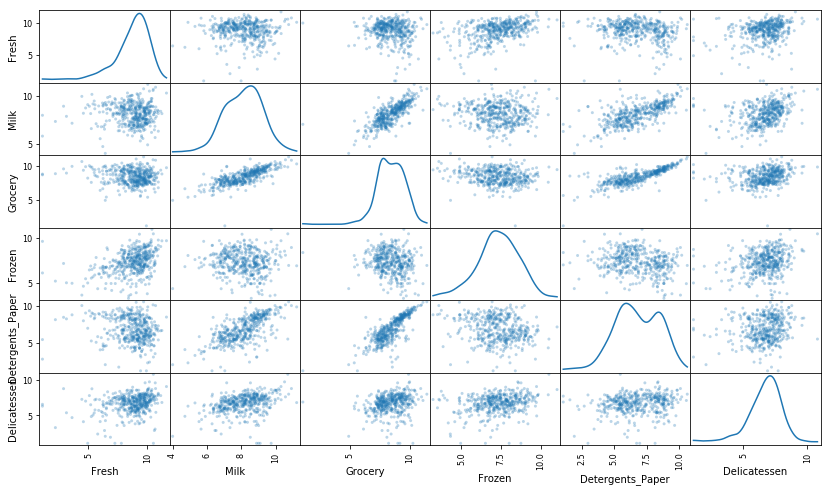

In [9]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal. For any pairs of features we have identified earlier as being correlated, we observe here that correlation is still present (and whether it is now stronger or weaker than before).

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [11]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)
    
# OPTIONAL: Select the indices for data points you wish to remove


# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [12]:
outliers

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [13]:
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154]

In [14]:
# Removing outliers

good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

### Observations

- Datapoints considered outliers that are present in more than one feature are: 65, 66, 75, 128, 154.

- K-Means is heavily influenced by the presence of outliers as they increase significantly the loss function that the algorithm tries to minimize. This loss function is the squared sum of the distances of each datapoint to the centroid, so, if the outlier is far enough, the centroid will be incorrectly situated. Because of this, the outliers shoul be removed.

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In [15]:
log_samples.shape

(3, 6)

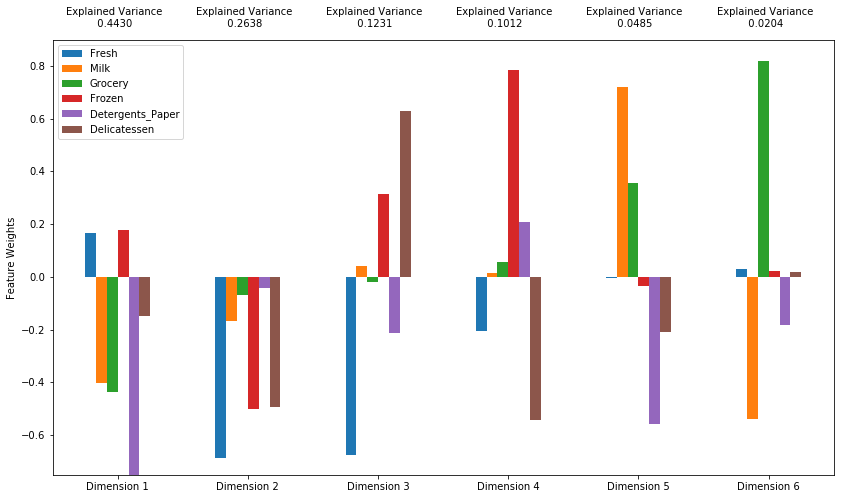

In [16]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Observations

- The variance explained by the first two Principal Components is the 70.68% of the total.

- The variance explained by the first three Principal Components is the 93.11% of the total.

- Dimensions discussion:

    - Dimension 1: This dimension represents well, in terms of negative variance, the following features: Detergent_Paper, Milk and groceries. Mostly utilities for everyday consuming.
    
    - Dimension 2: This dimension represents well, in terms of negative variance, the following features: Fresh, Frozen and Delicatessen. Mostly food consuming.
    
    - Dimension 3: This dimension represents well, in terms of positive variance, the Delicatessen features, and in terms of negative variance de Fresh feature. Food to be consumed on the day.
    
    - Dimension 4: This dimension represents well, in terms of positive variance, the Frozen feature, and in terms of negative variance, the Delicatessen Feature. Food that can be storaged.
    

### Observation
The code below to sehoe how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [18]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
The cell below show how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,3.0206,4.8169


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

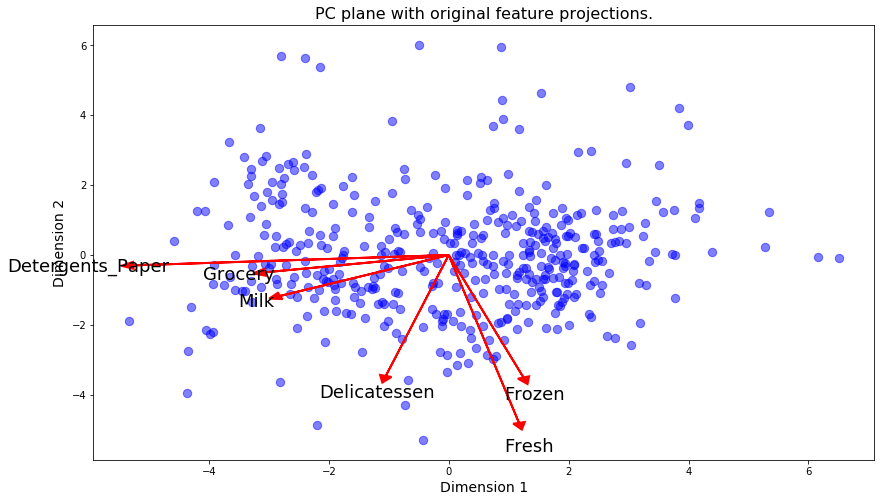

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.

## Clustering

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

**1) The main advantages of using K-Means as a cluster algorithm are:**

    - It is easy to implement.
    
    - With large number of variables, if (K is small), it may be computationally faster than hierarchichal clustering.
    
    - Consistent and scale-invariant.
    
    - It is guaranteed to converge.
    
**2) The main advantages of using Gaussian Mixture Models as a cluster algorithm are:**

    - It is much more flexible in terms of cluster covariance. Which means that each cluster can have unconstrained covariance structure. In other words, whereas K-means assumes that every cluster have spherical estructure, GMM allows eliptical.
    
    - Points can belong to different clusters, with different level of memebership. This level of membership is the probability of each point to belong to each cluster.
    
**3) Chosen algorithm:**
    
    - The chosen algorithm is Gaussian Mixture Model. Because data is not splitted in clear and different clusters, so we do not know how many clusters there are.
    
References:

https://www.quora.com/What-are-the-advantages-of-K-Means-clustering

https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    print('Sample predictions: ' + str(sample_preds))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42191684646261485 

Number of clusters: 3
Cluster Center: [[ 1.3874837  -0.24378903]
 [-2.04781298 -0.05820189]
 [-1.08932369  1.063399  ]]
Sample predictions: [2 2 2]
Silhouette score is: 0.4042487382407879 

Number of clusters: 4
Cluster Center: [[ 1.36580355  0.2583133 ]
 [-2.3145402   0.01022103]
 [-0.32043976  1.79401921]
 [ 1.17387101 -0.79626779]]
Sample predictions: [2 1 2]
Silhouette score is: 0.2932695648465841 

Number of clusters: 5
Cluster Center: [[ 1.71130552 -0.22201663]
 [-2.08799545 -0.5201485 ]
 [ 2.20617662  2.92837026]
 [ 0.03785843 -0.70356503]
 [-2.79826984  1.54857783]]
Sample predictions: [1 3 2]
Silhouette score is: 0.3004563887252593 

Number of clusters: 6
Cluster Center: [[ 0.62535432  0.56453323]
 [-1.99042622 -0.67842086]
 [ 2.11689604  3.15226455]
 [ 0.50197961 -1.80803617]
 [-2.79898205  1.72544922]
 [ 1.9303349

**Answer:**

- The Silhouette score for each number of clusters (from 2 to 6) are: 

    Scores: {2: 0.42191684646261496, 3: 0.40424873824078805, 4: 0.29326956484658406, 5: 0.30045638872525937, 6: 0.32613945047115767}
    
    
    
- The number of clusters with the best silhouette score is 2, with a 0.42 score.

### Cluster Visualization
Once we've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, we can now visualize the results in the code block below.

In [22]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=2)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_
print('Cluster Center: ' + str(centers))

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
print('Sample predictions: ' + str(sample_preds))

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
scores[i] = score
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[ 1.2512378  -0.18013806]
 [-2.22116886  0.31977698]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42191684646261485 



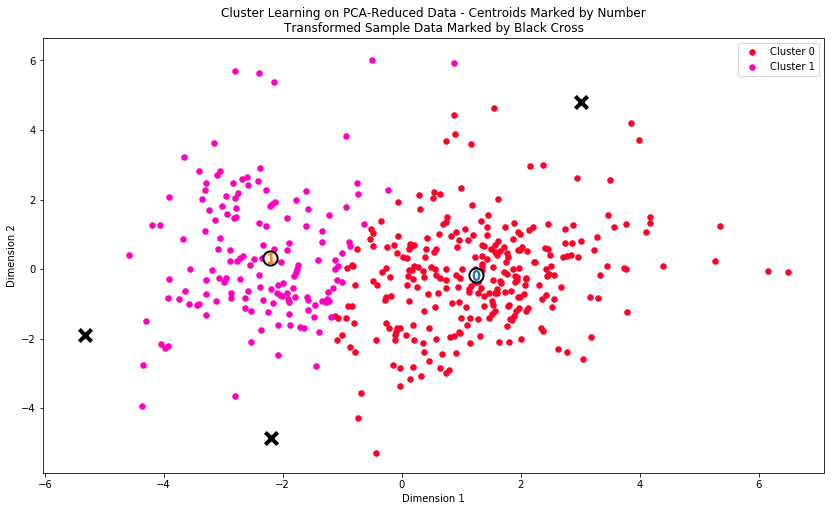

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [24]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Observations

- Segment 0 may represent a a fresh food market as every feature except Frozen and Fresh are below the median.

- Segment 1 may represent a supermarket as every feature except fresh and frozen are above the median.


In [25]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The code block below shows to which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


### Observations

- Sample point 0 --> Supermarket and the original guess was a retailer. This difference may be explained because of the size of the cluster (which is pretty big)

- Sample point 1 --> Supermarket and the originak guess was the same.

- Sample point 2 --> Fresh food market and the original guess was a restaurant which is reasonable considering the amount of the spending of the features.

## Conclusion

Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

A supervised learning algorithm could be used with the estimated product spending as attributes and the customer segment as the target variable, making it a classification problem (we would have 2 possible labels). As there is not  a clear mathematical relationship between the customer segment and the product spending KNN could be a good algorithm to work with.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

The code block below shows how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space.

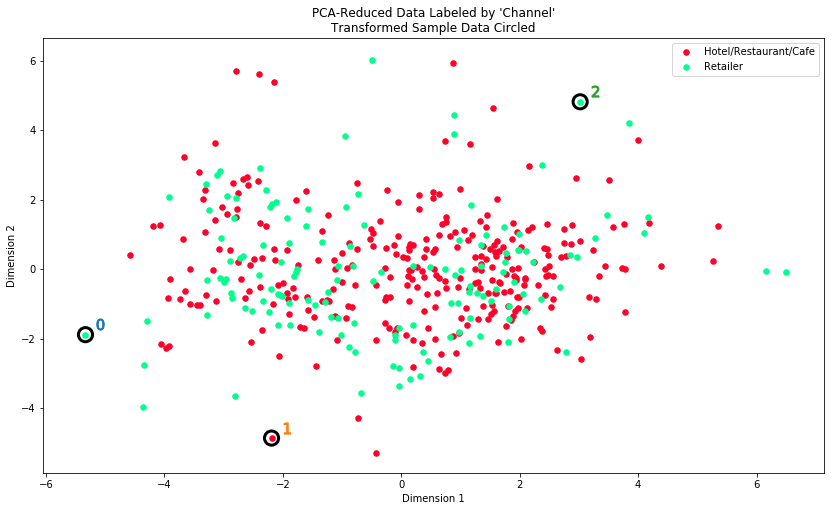

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, preds, pca_samples)

### Observations

- The cluster algorithm doeas a pretty good job of clustering the data to the underlying distribution as the cluster 0 can be associated perfectly with a retailer and the cluster 1 to the Ho/Re/Ca. 

- Yes, this definitions are consistent with the previous definitions of customer segments.